# Aula 1

## Vídeo 1.2 - Entendendo o problema

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dados-com-muitas-dimensoes/main/dados/hotel.csv')

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df['Booking_ID'].nunique()

36275

In [ ]:
df.drop(['Booking_ID'],axis=1,inplace=True)

In [ ]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [ ]:
df = pd.get_dummies(df, columns=['type_of_meal_plan','room_type_reserved','market_segment_type'])

In [ ]:
mapping_booking_status = {'Not_Canceled': 0, 'Canceled': 1}

In [ ]:
df['booking_status'] = df['booking_status'].map(mapping_booking_status)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


## Vídeo 1.3 - Treinando um modelo de ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo = RandomForestClassifier(n_estimators=20, random_state=2) #n_estimators=5,max_depth=4,

X = df.drop(['booking_status'],axis=1)
y = df['booking_status']

X_treino,X_teste, y_treino, y_teste = train_test_split(X,y, random_state=50, test_size=30,stratify=y)


In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)
modelo.fit(X_treino,y_treino)
modelo.score(X_teste,y_teste)

0.9333333333333333

## Vídeo 1.4 - Balanceamento dos dados

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
modelo_d = DummyClassifier(strategy='most_frequent')
modelo_d.fit(X_treino,y_treino)
print(modelo_d.score(X_teste,y_teste))

0.6666666666666666


In [ ]:
(df['booking_status'].value_counts() / len(df))*100

0    67.236389
1    32.763611
Name: booking_status, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino, y_treino)

In [ ]:
y_treino_balanceado.value_counts() / len(y_treino_balanceado)

0    0.5
1    0.5
Name: booking_status, dtype: float64

In [ ]:
modelo_d = DummyClassifier(strategy='most_frequent')
modelo_d.fit(X_treino_balanceado,y_treino_balanceado)
modelo_d.score(X_teste,y_teste)

0.6666666666666666

In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)
modelo.fit(X_treino_balanceado,y_treino_balanceado)
modelo.score(X_teste,y_teste)

0.9333333333333333

# Aula 2 - Análise de dados

## Vídeo 2.1 - Entendendo as features

In [ ]:
import seaborn as sns

<Axes: xlabel='booking_status', ylabel='arrival_month'>

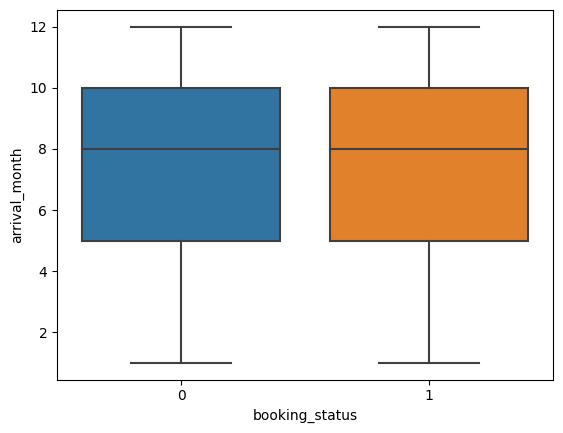

In [ ]:
sns.boxplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

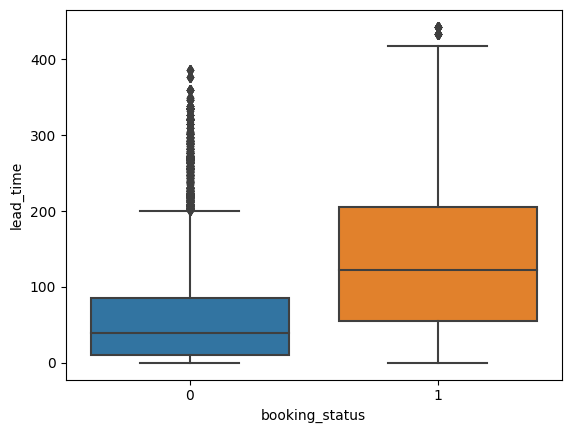

In [ ]:
sns.boxplot(X_treino, x=y_treino, y='lead_time')

## Vídeo 2.2 - Correlação entre features

In [ ]:
correlacao = pd.concat([X_treino,y_treino],axis=1).corr()

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

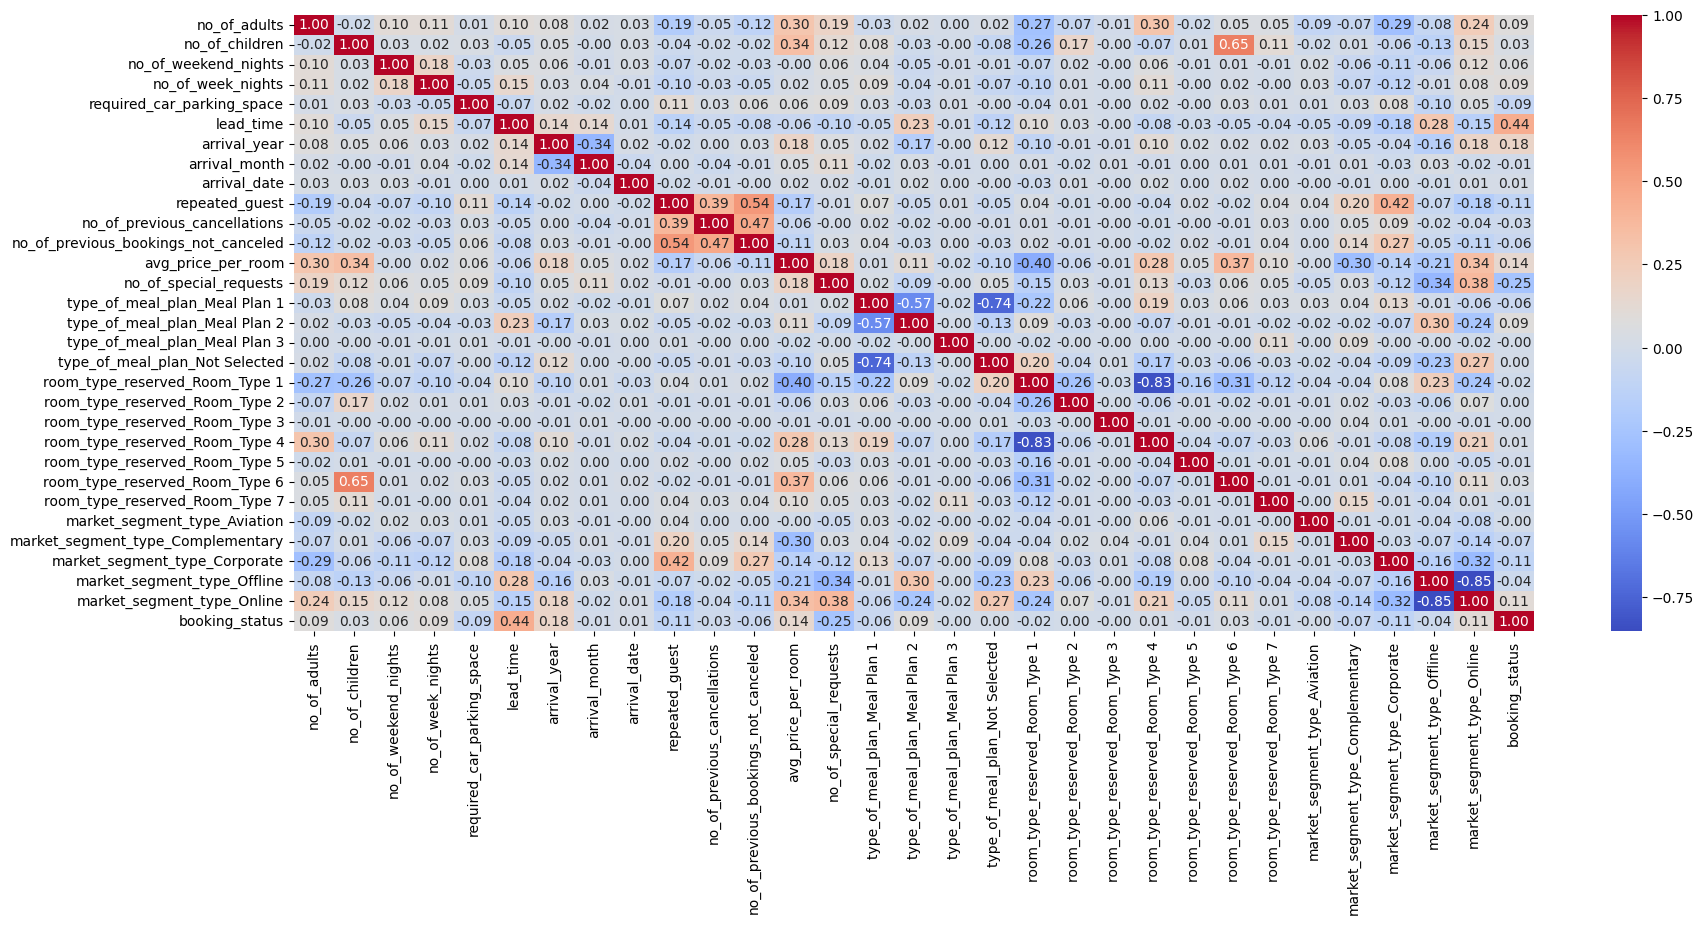

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt='.2f')

## Vídeo 2.3 - Feature Importance

In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)
modelo.fit(X_treino,y_treino)
print(f'Score: {modelo.score(X_teste,y_teste)}')
importancia = pd.DataFrame({'colunas':X_treino.columns,'importancia':modelo.feature_importances_})

Score: 0.9333333333333333


In [ ]:
importancia5 = importancia.sort_values(by="importancia", ascending=False).head(10)

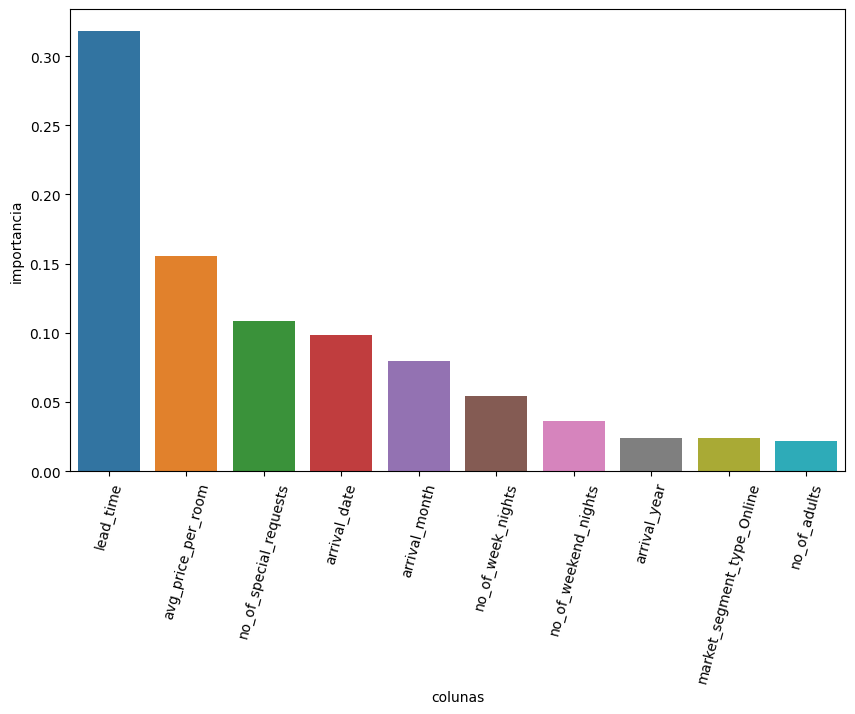

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='colunas',y='importancia',data=importancia5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);